# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Arliyandi
- **Email:** arlialya@gmail.com
- **ID Dicoding:** itsmatcha

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?
- Apakah musim tertentu menunjukkan tingkat penyewaan yang lebih tinggi atau rendah?

## Import Semua Packages/Library yang Digunakan

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Memuat Tabel Day**

In [48]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

**Memuat Tabel Hour**

In [49]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

**Insight:**
- Dapat kita perhatikan terdapat kolom yang terlihat sangat mirip diantara kedua kolom, hanya terdapat perbedaan kolom hr pada tabel hour. Dijelaskan pada file readme, untuk beberapa kolom khusus diataranya season (1:springer, 2:summer, 3:fall, 4:winter), year(0: 2011, 1:2012), month (bulan 1-12), hr(jam 0-23), dan sebagainya. sehingga menjadikan dataset ini tampaknya sangat kaya untuk dianalisis
- Keterangan tambahan lainnya, pada kolom casual, registered, dan cnt ini terlihat seperti proses penjumlahan. Yang dimana casual ini menerangkan pengguna yang tidak teregistrasi oleh "sistem", sedangkan registered ini adalah pengguna yang teregistrasi oleh sistem. Sedangkan cnt ini adalah jumlah penggunaan secara keseluruhan (cnt = casual + registered)
- Pada Weathersit, terdapat 4 kategori :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Assessing Data

In [50]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [51]:
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [52]:
day_df[["holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]].describe()

holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
std      0.167155    2.004787    0.465233    0.544894    0.183051    0.162961   
min      0.000000    0.000000    0.000000    1.000000    0.059130    0.079070   
25%      0.000000    1.000000    0.000000    1.000000    0.337083    0.337842   
50%      0.000000    3.000000    1.000000    1.000000    0.498333    0.486733   
75%      0.000000    5.000000    1.000000    2.000000    0.655417    0.608602   
max      1.000000    6.000000    1.000000    3.000000    0.861667    0.840896   

              hum   windspeed       casual   registered          cnt  
count  731.000000  731.000000   731.000000   731.000000   731.000000  
mean     0.627894    0.190486   848.176471  3656.172367  4504.348837  
std      0.142429    0.077498   686.622488  1560.256377  1937.211452  
min      0.000000    0.022392     2.000000    20.000000    22.000000  
25%      0.520000    0.134950   315.500000  2497.000000  3152.000000  
50%      0.626667    0.180975   713.000000  3662.000000  4548.000000  
75%      0.730209    0.233214  1096.000000  4776.500000  5956.000000  
max      0.972500    0.507463  3410.000000  6946.000000  8714.000000

In [53]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [54]:
hour_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [55]:
hour_df[["holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]].describe()

holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

**Insight:**
- Secara umum, tidak terdapat keanehan data pada kedua tabel tersebut. Jumlah entry dan count setiap kolom sama, dan juga tipe data yang digunakan. Namun perlu sedikit perbaikan pada tipe data dteday yang bersifat object seharusnya datetime
- Pada tabel Day, terdapat keanehan pada data minimal di kolom humidity, karena tidak seharusnya humidity bernilai 0
- Pada tabel hour, ada beberapa keanehan yang serupa, humidity bernilai 0, windspeed 0

### Cleaning Data

**MEMBERSIHKAN DATA TABEL DAY**

- **Memperbaiki Kesalahan Tipe Data**

In [56]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [57]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- **Menangani nilai kosong pada hum**

In [58]:
day_df[day_df.hum == day_df.hum.min()]

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
68       69 2011-03-10       1   0     3        0        4           1   

    weathersit      temp     atemp  hum  windspeed  casual  registered  cnt  
68           3  0.389091  0.385668  0.0   0.261877      46         577  623

*Karena Hanya terdapat 1 Row yang bermasalah, disini saya memutuskan untuk menghapus row tersebut*

In [59]:
day_df = day_df[day_df["hum"] > 0.0]

In [60]:
day_df[day_df.hum == day_df.hum.min()]

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
49       50 2011-02-19       1   0     2        0        6           0   

    weathersit      temp     atemp       hum  windspeed  casual  registered  \
49           1  0.399167  0.391404  0.187917   0.507463     532        1103   

     cnt  
49  1635

In [61]:
day_df[["hum"]].describe()

hum
count  730.000000
mean     0.628754
std      0.140614
min      0.187917
25%      0.520521
50%      0.627083
75%      0.730313
max      0.972500

**MEMBERSIHKAN DATA TABEL HOUR**

- **Memperbaiki Kesalahan Tipe Data**

In [62]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [63]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- **Menangani Nilai Kosong pada hum dan windspeed**

In [64]:
hour_df[["windspeed"]].describe()

windspeed
count  17379.000000
mean       0.190098
std        0.122340
min        0.000000
25%        0.104500
50%        0.194000
75%        0.253700
max        0.850700

In [65]:
hour_df[hour_df.hum == hour_df.hum.min()]

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1551     1552 2011-03-10       1   0     3   0        0        4           1   
1552     1553 2011-03-10       1   0     3   1        0        4           1   
1553     1554 2011-03-10       1   0     3   2        0        4           1   
1554     1555 2011-03-10       1   0     3   5        0        4           1   
1555     1556 2011-03-10       1   0     3   6        0        4           1   
1556     1557 2011-03-10       1   0     3   7        0        4           1   
1557     1558 2011-03-10       1   0     3   8        0        4           1   
1558     1559 2011-03-10       1   0     3   9        0        4           1   
1559     1560 2011-03-10       1   0     3  10        0        4           1   
1560     1561 2011-03-10       1   0     3  11        0        4           1   
1561     1562 2011-03-10       1   0     3  12        0        4           1   
1562     1563 2011-03-10       1   0     3  13        0        4           1   
1563     1564 2011-03-10       1   0     3  14        0        4           1   
1564     1565 2011-03-10       1   0     3  15        0        4           1   
1565     1566 2011-03-10       1   0     3  16        0        4           1   
1566     1567 2011-03-10       1   0     3  17        0        4           1   
1567     1568 2011-03-10       1   0     3  18        0        4           1   
1568     1569 2011-03-10       1   0     3  19        0        4           1   
1569     1570 2011-03-10       1   0     3  20        0        4           1   
1570     1571 2011-03-10       1   0     3  21        0        4           1   
1571     1572 2011-03-10       1   0     3  22        0        4           1   
1572     1573 2011-03-10       1   0     3  23        0        4           1   

      weathersit  temp   atemp  hum  windspeed  casual  registered  cnt  
1551           3  0.34  0.3182  0.0     0.2537       3           0    3  
1552           3  0.34  0.3182  0.0     0.2537       0           2    2  
1553           3  0.34  0.3182  0.0     0.2537       0           1    1  
1554           3  0.36  0.3485  0.0     0.1940       1           2    3  
1555           3  0.36  0.3333  0.0     0.3284       0          12   12  
1556           3  0.38  0.3939  0.0     0.2239       1          36   37  
1557           3  0.38  0.3939  0.0     0.2836       1          43   44  
1558           3  0.40  0.4091  0.0     0.2239       1          23   24  
1559           3  0.40  0.4091  0.0     0.1642       0          17   17  
1560           3  0.40  0.4091  0.0     0.2537       6           5   11  
1561           3  0.42  0.4242  0.0     0.2239       4          30   34  
1562           3  0.42  0.4242  0.0     0.2239       1          11   12  
1563           3  0.44  0.4394  0.0     0.2985       0          12   12  
1564           3  0.44  0.4394  0.0     0.2239       3          11   14  
1565           3  0.42  0.4242  0.0     0.2537       1          20   21  
1566           2  0.44  0.4394  0.0     0.3881       2         109  111  
1567           3  0.44  0.4394  0.0     0.3582       2          80   82  
1568           3  0.44  0.4394  0.0     0.5821       5          51   56  
1569           3  0.36  0.3333  0.0     0.3284       9          29   38  
1570           3  0.36  0.3485  0.0     0.2239       1          27   28  
1571           2  0.34  0.3333  0.0     0.1343       4          30   34  
1572           3  0.34  0.3485  0.0     0.0896       1          26   27

In [66]:
hour_df[hour_df.windspeed == hour_df.windspeed.min()]

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17319    17320 2012-12-29       1   1    12  12        0        6           0   
17320    17321 2012-12-29       1   1    12  13        0        6           0   
17322    17323 2012-12-29       1   1    12  15        0        6           0   
17330    17331 2012-12-29       1   1    12  23        0        6           0   
17350    17351 2012-12-30       1   1    12  19        0        0           0   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.24  0.2879  0.81        0.0       3          13   16  
1               1  0.22  0.2727  0.80        0.0       8          32   40  
2               1  0.22  0.2727  0.80        0.0       5          27   32  
3               1  0.24  0.2879  0.75        0.0       3          10   13  
4               1  0.24  0.2879  0.75        0.0       0           1    1  
...           ...   ...     ...   ...        ...     ...         ...  ...  
17319           3  0.20  0.2424  1.00        0.0       5          43   48  
17320           3  0.20  0.2424  1.00        0.0      13          71   84  
17322           2  0.24  0.2424  0.87        0.0      19         110  129  
17330           2  0.26  0.2424  0.60        0.0       0          32   32  
17350           1  0.34  0.3636  0.61        0.0      16          86  102  

[2180 rows x 17 columns]

*Pada bagian windspeed tabel hour ini, sangat banyak jumlah row yang ternyata memiliki nilai windspeed 0.0. Dan saya memutuskan untuk membiarkan nilai windspeed ini tetap memiliki 0.0 karena perubahan yang dilakukan dapat mempengaruhi data terlalu besar*

In [67]:
day_df = day_df[day_df["hum"] > 0.0]

In [68]:
day_df[day_df.hum == day_df.hum.min()]

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
49       50 2011-02-19       1   0     2        0        6           0   

    weathersit      temp     atemp       hum  windspeed  casual  registered  \
49           1  0.399167  0.391404  0.187917   0.507463     532        1103   

     cnt  
49  1635

**Insight:**
- Berdasarkan proses Gathering data yang didefinisikan terdapat beberapa poin kekeliruan seperti tipe data yang keliru pada dteday yang sebelumnya objek, pada tahap ini tipe data tersebut diubah menjadi datetime agar lebih mudah diolah kedepannya.
- Selain itu, anomali data pada humidity (Day & Hour) yang hanya bernilai 0.0 dihapuskan karena dinilai tidak memungkinkan untuk humidity bernilai 0. Sedangkan pada windspeed, dikarenakan terlalu banyak record data yang bernilai 0.0, maka diputuskan untuk tidak merubah sama sekali data yang ada karena dapat memengaruhi data secara major. Hal ini tampak menjadi tidak konsisten mengenai perilaku terhadap nilai 0.0 diantara kedua kolom yang bersangkutan karena kurangnya informasi pada dataset yang dijadikan bahan analisis data.

## Exploratory Data Analysis (EDA)

### Explore Data Agregasi Harian "day_df"

In [69]:
day_df.describe(include="all")

instant                         dteday      season          yr  \
count  730.000000                            730  730.000000  730.000000   
mean   366.406849  2012-01-01 09:45:51.780822016    2.498630    0.501370   
min      1.000000            2011-01-01 00:00:00    1.000000    0.000000   
25%    184.250000            2011-07-03 06:00:00    2.000000    0.000000   
50%    366.500000            2012-01-01 12:00:00    3.000000    1.000000   
75%    548.750000            2012-07-01 18:00:00    3.000000    1.000000   
max    731.000000            2012-12-31 00:00:00    4.000000    1.000000   
std    211.023699                            NaN    1.110184    0.500341   

             mnth     holiday     weekday  workingday  weathersit        temp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     6.524658    0.028767    2.995890    0.683562    1.393151    0.495530   
min      1.000000    0.000000    0.000000    0.000000    1.000000    0.059130   
25%      4.000000    0.000000    1.000000    0.000000    1.000000    0.336875   
50%      7.000000    0.000000    3.000000    1.000000    1.000000    0.499167   
75%     10.000000    0.000000    5.000000    1.000000    2.000000    0.655625   
max     12.000000    1.000000    6.000000    1.000000    3.000000    0.861667   
std      3.451815    0.167266    2.005817    0.465405    0.542015    0.183134   

            atemp         hum   windspeed       casual   registered  \
count  730.000000  730.000000  730.000000   730.000000   730.000000   
mean     0.474475    0.628754    0.190388   849.275342  3660.390411   
min      0.079070    0.187917    0.022392     2.000000    20.000000   
25%      0.337794    0.520521    0.134950   316.250000  2502.250000   
50%      0.487364    0.627083    0.180971   717.000000  3664.500000   
75%      0.608916    0.730313    0.233207  1096.500000  4783.250000   
max      0.840896    0.972500    0.507463  3410.000000  6946.000000   
std      0.163040    0.140614    0.077506   686.449738  1557.149836   

               cnt  
count   730.000000  
mean   4509.665753  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000  
std    1933.194931

In [70]:
corr_weather_day = day_df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr()
print(corr_weather_day)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991699  0.125160  -0.157338  0.627774
atemp      0.991699  1.000000  0.138585  -0.183099  0.631439
hum        0.125160  0.138585  1.000000  -0.246366 -0.114625
windspeed -0.157338 -0.183099 -0.246366   1.000000 -0.232790
cnt        0.627774  0.631439 -0.114625  -0.232790  1.000000


*Dari Data diatas, Dapat Kita Perhatikan beberapa kesimpulan :*
*(1) Temperatur adalah faktor yang paling signifikan dalam mempengaruhi jumlah penyewaan sepeda, dengan korelasi positif yang kuat*
*(2) Kelembapan memiliki pengaruh negatif terhadap penyewaan sepeda, meskipun tidak terlalu signifikan di tingkat harian.*
*(3) Kecepatan angin hampir tidak memiliki pengaruh, baik positif maupun negatif*

In [71]:
weather_group_day = day_df.groupby("weathersit")["cnt"].sum()
print(weather_group_day)
print("Total Rental: ", day_df["cnt"].sum())

weathersit
1    2257952
2     996858
3      37246
Name: cnt, dtype: int64
Total Rental:  3292056


In [72]:
season_group_day = day_df.groupby("season")["cnt"].sum()
print(season_group_day)
print("Total Rental: ", day_df["cnt"].sum())

season
1     470725
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64
Total Rental:  3292056


Kondisi cuaca memiliki dampak signifikan pada rata-rata jumlah penyewaan sepeda. Semakin buruk cuaca (dari weathersit=1 ke weathersit=3), semakin rendah rata-rata jumlah penyewaan sepeda.

### Explore Data Agregasi Per Jam "hour_df"

In [73]:
hour_df.describe(include="all")

instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000      6.000000      0.000000      1.000000      0.000000   
50%        7.000000     12.000000      0.000000      3.000000      1.000000   
75%       10.000000     18.000000      0.000000      5.000000      1.000000   
max       12.000000     23.000000      1.000000      6.000000      1.000000   
std        3.438776      6.914405      0.167165      2.005771      0.465431   

         weathersit          temp         atemp           hum     windspeed  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       1.425283      0.496987      0.475775      0.627229      0.190098   
min        1.000000      0.020000      0.000000      0.000000      0.000000   
25%        1.000000      0.340000      0.333300      0.480000      0.104500   
50%        1.000000      0.500000      0.484800      0.630000      0.194000   
75%        2.000000      0.660000      0.621200      0.780000      0.253700   
max        4.000000      1.000000      1.000000      1.000000      0.850700   
std        0.639357      0.192556      0.171850      0.192930      0.122340   

             casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  
mean      35.676218    153.786869    189.463088  
min        0.000000      0.000000      1.000000  
25%        4.000000     34.000000     40.000000  
50%       17.000000    115.000000    142.000000  
75%       48.000000    220.000000    281.000000  
max      367.000000    886.000000    977.000000  
std       49.305030    151.357286    181.387599

In [74]:
corr_weather_hour = hour_df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr()
print(corr_weather_hour)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
cnt        0.404772  0.400929 -0.322911   0.093234  1.000000


*Hasil Analisis dari proses diatas ini memiliki hasil yang tampak mirip dengan data pada day.csv. Hanya terdapat sedikit perbedaan yang dihasilkan dari detail jam dan dari proses cleansing data. Selanjutnya, untuk mempermudah proses analisa pada perbandingan tiap waktu, saya membagi waktu dari 0-23 menjadi beberapa kategori, Morning (Pagi) untuk pukul 5 - 11, Noon(Siang) untuk pukul 11 - 16, Afternoon(Sore) untuk 16 - 20, dan malam hari. Lalu tambahkan pada frame data hour_df*

In [75]:
def categorize_time(hour):
    if 5 <= hour < 11:
        return "Morning"
    elif 11 <= hour < 16:
        return "Noon"
    elif 16 <= hour < 20:
        return "Afternoon"
    else:
        return "Night"

# Menambahkan kolom 'time_period' ke hour_df
hour_df["time_period"] = hour_df["hr"].apply(categorize_time)

# Verifikasi hasil
print(hour_df[["hr", "time_period"]].head(10))

   hr time_period
0   0       Night
1   1       Night
2   2       Night
3   3       Night
4   4       Night
5   5     Morning
6   6     Morning
7   7     Morning
8   8     Morning
9   9     Morning


In [76]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   yr           17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [77]:
weather_group_hour = hour_df.groupby("weathersit")["cnt"].sum()
print(weather_group_hour)
print("Total Rental: ", day_df["cnt"].sum())

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64
Total Rental:  3292056


*Selain melakukan pengkategorian dari pembagian waktu, mari kita lakukan hal yang sama untuk pembagian cuaca dengan meringkas pada kategori khas yang mewakili tipe kriteria yang dimaksud pada weathersit*

In [78]:
hour_df["weather_group"] = hour_df.weathersit.apply(lambda x: "Clear" if x == 1 else("Mist" if x == 2 else("Rain" if x == 3 else "Storm")))
RentByWeather = hour_df.groupby(by="weather_group").cnt.sum().sort_values(ascending=False)
print(RentByWeather)
print("Total Rental: ", hour_df["cnt"].sum())

weather_group
Clear    2338173
Mist      795952
Rain      158331
Storm        223
Name: cnt, dtype: int64
Total Rental:  3292679


In [79]:
AverageRentByWeather = hour_df.groupby(by="weather_group").cnt.mean().sort_values(ascending=False)
print(AverageRentByWeather)
print("Average Rental: ", hour_df["cnt"].mean())

weather_group
Clear    204.869272
Mist     175.165493
Rain     111.579281
Storm     74.333333
Name: cnt, dtype: float64
Average Rental:  189.46308763450142


In [80]:
hour_df["season_group"] = hour_df.season.apply(lambda x: "Spring" if x == 1 else("Summer" if x == 2 else("Fall" if x == 3 else "Winter")))
RentBySeason = hour_df.groupby(by="season_group").cnt.sum().sort_values(ascending=False)
print(RentBySeason)
print("Total Rental: ", hour_df["cnt"].sum())

season_group
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64
Total Rental:  3292679


In [81]:
AverageRentBySeason = hour_df.groupby(by="season_group").cnt.mean().sort_values(ascending=False)
print(AverageRentBySeason)
print("Average Rental: ", hour_df["cnt"].mean())

season_group
Fall      236.016237
Summer    208.344069
Winter    198.868856
Spring    111.114569
Name: cnt, dtype: float64
Average Rental:  189.46308763450142


*Dari Dataframe diatas, dapat kita perhatikan selain dari kondisi cuaca, musim juga memiliki pengaruh yang signifikan pada berapa banyak penyewaan sepeda terjadi*

In [82]:
RentByHour = hour_df.groupby(["weathersit", "time_period"]).agg(
    avg_cnt=("cnt", "mean"),  # Rata-rata cnt per time_period
    total_cnt=("cnt", "sum")   # Total cnt per weathersit dan time_period
).reset_index()

print(RentByHour)
print("Total Rental/cnt: ", day_df["cnt"].sum())

    weathersit time_period     avg_cnt  total_cnt
0            1   Afternoon  407.325271     825241
1            1     Morning  181.060629     483794
2            1       Night   92.454463     407077
3            1        Noon  269.057526     622061
4            2   Afternoon  347.842276     213923
5            2     Morning  186.740851     250046
6            2       Night   70.756949     109461
7            2        Noon  213.348035     222522
8            3   Afternoon  226.391941      61805
9            3     Morning  107.433628      36420
10           3       Night   48.528846      25235
11           3        Noon  121.501742      34871
12           4   Afternoon  100.000000        200
13           4       Night   23.000000         23
Total Rental/cnt:  3292056


*Dari Data diatas Dapat kita perhatikan Cuaca Sangat memengaruhi jumlah penyewaan rental sepeda. Ketika cuaca "Clear", jumlah penyewaan lebih banyak. Sebaliknya, ketika sedang badai jumlah penyewaan menurun sangat drastis*

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?

Dikarenakan pada tahap EDA saya sudah membuat DataFrame baru, maka pada tahap Visualisasi ini saya cukup memanggil dataframe yang sama

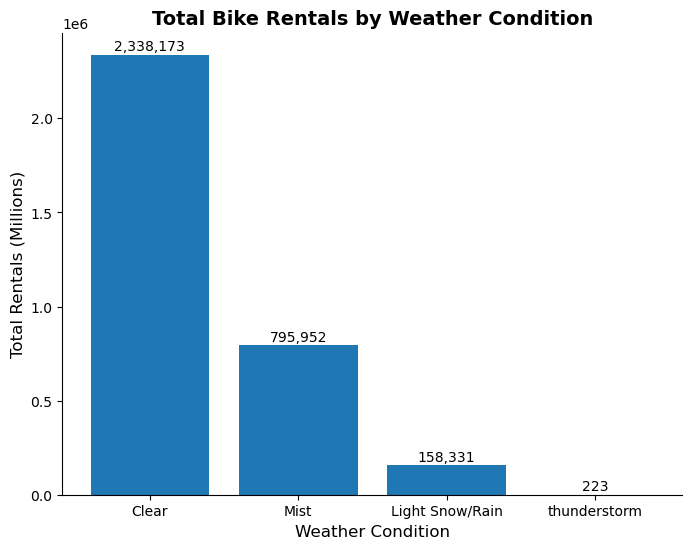

Total Rental:  3292056


In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(
    ['Clear', 'Mist', 'Light Snow/Rain', 'thunderstorm'],
    weather_group_hour
)

# Detail Num
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        yval + 5000,
        f'{yval:,.0f}',
        ha='center', 
        va='bottom', 
        fontsize=10
    )

ax.set_title('Total Bike Rentals by Weather Condition', fontsize=14, fontweight='bold')
ax.set_xlabel('Weather Condition', fontsize=12)
ax.set_ylabel('Total Rentals (Millions)', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

print("Total Rental: ", day_df["cnt"].sum())

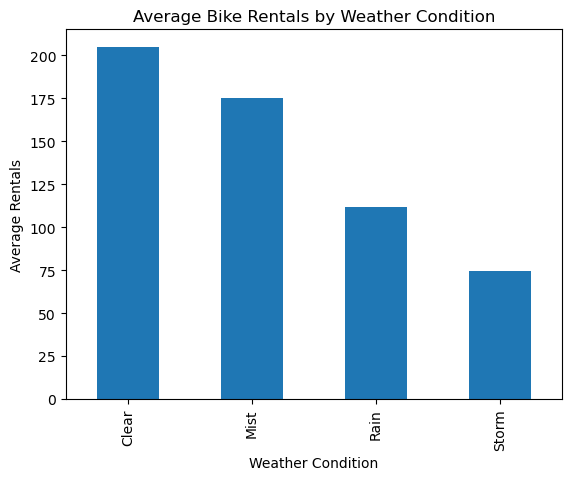

In [84]:
AverageRentByWeather.plot(kind='bar')

plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')

plt.show()

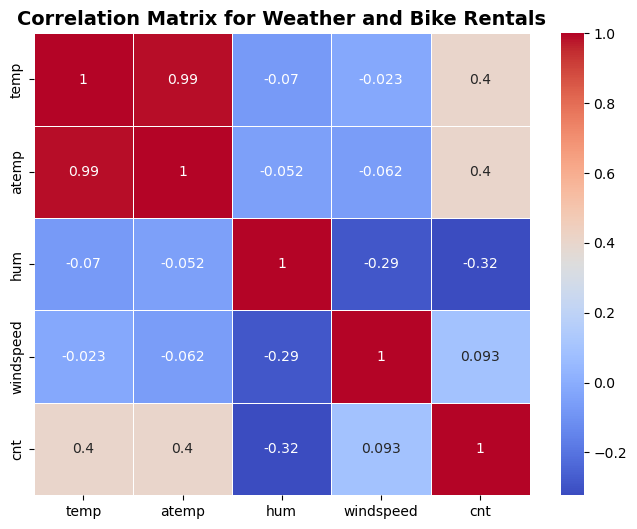

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_weather_hour, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Weather and Bike Rentals', fontsize=14, fontweight='bold')
plt.show()

### Pertanyaan 2: Apakah musim tertentu menunjukkan tingkat penyewaan yang lebih tinggi atau rendah?

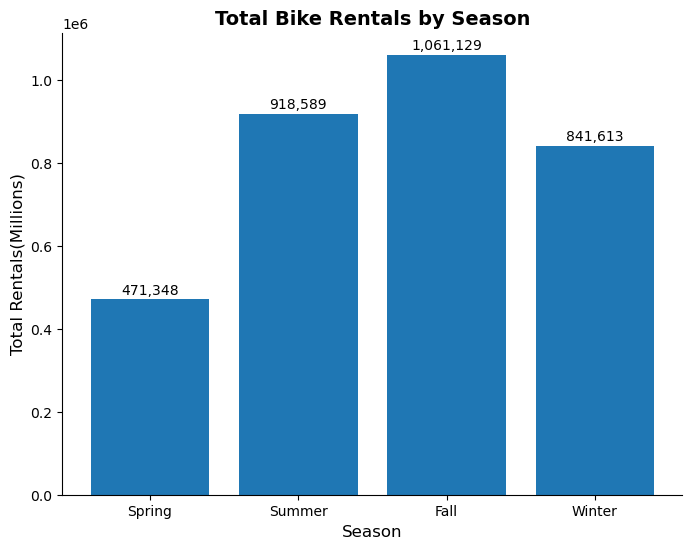

In [86]:
RentBySeason = hour_df.groupby(by="season_group")["cnt"].sum()
RentBySeason = RentBySeason.reindex(["Spring", "Summer", "Fall", "Winter"])

# Membuat bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(
    RentBySeason.index,
    RentBySeason.values,
)

for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 5000,
        f'{yval:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.set_title('Total Bike Rentals by Season', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Total Rentals(Millions)', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

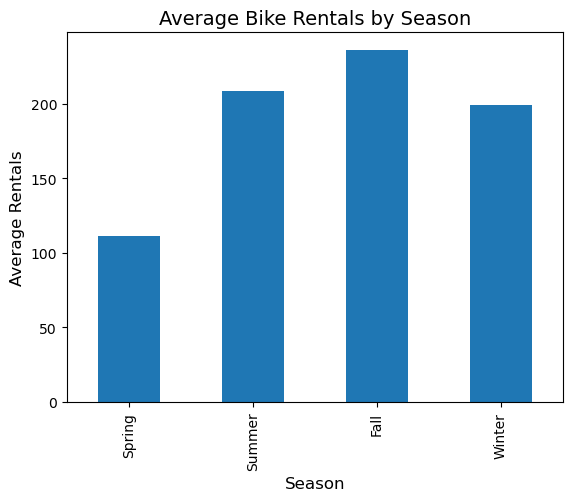

In [87]:
AverageRentBySeason = hour_df.groupby(by="season_group")["cnt"].mean()
AverageRentBySeason = AverageRentBySeason.reindex(["Spring", "Summer", "Fall", "Winter"])
AverageRentBySeason.plot(kind='bar')

plt.title('Average Bike Rentals by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)

plt.show()


**Insight:**
- Cuaca memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda: Cuaca Clear (cerah) menunjukkan jumlah penyewaan tertinggi dibandingkan dengan kategori cuaca lainnya, menunjukkan preferensi pengguna untuk menggunakan sepeda dalam kondisi cuaca yang baik.
- Temperatur memiliki korelasi positif tertinggi dengan jumlah penyewaan sepeda, menunjukkan bahwa cuaca hangat mendorong lebih banyak pengguna.
- Humidity (kelembapan) memiliki korelasi negatif terhadap penyewaan sepeda, yang berarti kelembapan tinggi dapat mengurangi kenyamanan pengguna.
- Kecepatan angin (windspeed) memiliki korelasi yang sangat rendah, menunjukkan bahwa faktor ini tidak begitu mempengaruhi keputusan pengguna.
- Selain cuaca, Musim juga sangat memengaruhi jumlah penyewaan sepeda. Dimana ditunjukan Pada Musim Gugur jumlah penyewaan sepeda cenderung sangat tinggi dibanding musim lainnya

Masih terdapat banyak hal yang di eksplor dari data ini, seperti pada waktu mana saja penyewaan sepeda tinggi, atau rendah. Apakah itu sore, Pagi, dan sebagainya namun diluar pertanyaan yang diajukan.

## Analisis Lanjutan (Opsional)

### PEAK HOUR ANALYSYS : Penyewaan Sepeda

***Peak Hour Analisys adalah Analisis Lanjutan untuk melihat Jam-jam penyewaan Tertinggi. Hal ini dapat dilakukan guna mendukung keputusan operasional dengan melihat pola perilaku para pengguna.***
- Langkah pertama, dikarenakan Peak Hour, maka tentunya kita akan menggunakan data dari hour_df yang memiliki kolom hr didalamnya. Lalu mendapatkan nilai rata-rata dari 24 jam yang tersedia pada dataset

In [88]:
hourly_rentals = hour_df.groupby("hr")["cnt"].mean()
print(hourly_rentals)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


- Selanjutnya Kita tinggal membuatkan visualisasi data dari data diatas disajikan dalam bentuk visual. Tidak lupa untuk menambahkan garis threshold untuk melihat rata rata data penyewaan secara keseluruhan

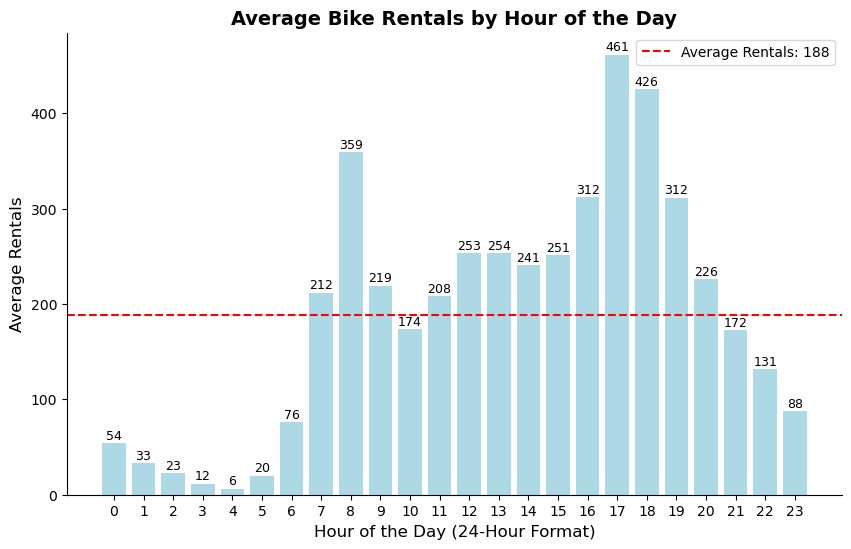

In [89]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(hourly_rentals.index, hourly_rentals.values, color='lightblue')

for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        yval + 1, 
        f'{yval:,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=9
    )

# garis threshold untuk rata-rata
mean_value = hourly_rentals.mean()
ax.axhline(mean_value, color='red', linestyle='--', label=f"Average Rentals: {mean_value:,.0f}")
ax.legend()

# Label
ax.set_title("Average Bike Rentals by Hour of the Day", fontsize=14, fontweight='bold')
ax.set_xlabel("Hour of the Day (24-Hour Format)", fontsize=12)
ax.set_ylabel("Average Rentals", fontsize=12)
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**Insight**
- Dari data diatas, dapat kita perhatikan umumnya rata-rata penyewaan tertinggi terjadi pada pukul 17 - 18
- Selain itu, Dimulai tengah malah sampai pukul 6 pagi menunjukan penyewaan yang cenderung rendah, dengan tingkat rata-rata penyewaan terendah pada pukul 4 pagi
- Dari semua data penyewaan, rata rata dari penyewaan adalah sebanyak 188 penyewaan/hr

## Conclusion

- Conclution pertanyaan 1 : Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda:
a. Cuaca cerah (Clear) memiliki rata-rata penyewaan tertinggi.
b. Kondisi cuaca buruk seperti Thunderstorm menunjukkan penyewaan yang sangat rendah.
- Conclution pertanyaan 2 : Musim juga memainkan peran penting :
a. Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi, diikuti oleh Musim Panas (Summer).
b. Musim Semi (Spring) dan Musim Dingin (Winter) memiliki jumlah penyewaan lyanbg relatif rendah.

In [90]:
hour_df.to_csv("dashboard/main_data.csv", index=False)